In [112]:
#Cargamos todas las librerías para el proyecto, Pandas y Numpy para manipulación de datos y 
# Seaborn y Matplotlib para visualización de los mismos.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
#Cargo el dataframe del archivo provisto de hospitalizaciones, el que se encuentra enfocado a entrenar el modelo de Machine Learning.

hospitalizaciones_train = pd.read_csv('Datasets/hospitalizaciones_train.csv')
hospitalizaciones_train

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,63105,31-40,Female,Trauma,Minor,Asthama,3,Yes,3902.291076,8
409996,5,gynecology,D,Dr Nathan,5,129292,21-30,Female,Trauma,Extreme,Other,4,No,4771.995223,9
409997,4,gynecology,D,Dr Sarah,9,11399,21-30,Female,Emergency,Minor,Asthama,4,Yes,3816.994210,9
409998,10,gynecology,D,Dr Olivia,10,75003,21-30,Female,Trauma,Moderate,Other,2,Yes,3841.577491,9


In [114]:
#La suma de la cantidad de valores unicos que se encuentran en la columna 'Available Extra Rooms in Hospital'

hospitalizaciones_train['Available Extra Rooms in Hospital'].value_counts()

3     118860
2     115845
4      93488
5      39017
6      12815
1      10021
7       4058
12      2347
24      2299
21      1941
13      1567
8       1443
11      1307
0       1293
10      1282
14      1032
20       854
9        531
Name: Available Extra Rooms in Hospital, dtype: int64

In [115]:
#Valores que se encuentran en la columna 'Department'

hospitalizaciones_train.Department.value_counts()

gynecology            281625
radiotherapy           69132
anesthesia             36250
TB & Chest disease     18825
surgery                 4168
Name: Department, dtype: int64

In [116]:
#Esta función fue creada para facilitar el proceso de análisis de valores mayores, iguales o menores de 8 de estadía de los distintas columnas. Esto para poder ver si
#alguna información de la columna puede llegar a tener correlación con que el paciente se quede más o menos tiempo.

def info_column_value_percentage(df,column,first_column_value:str):
    column_more_value = df.loc[(df[column] == first_column_value) & (df['Stay (in days)'] > 8)]
    column_equal_value = df.loc[(df[column] == first_column_value) & (df['Stay (in days)'] == 8)]
    column_less_value = df.loc[(df[column] == first_column_value) & (df['Stay (in days)'] < 8)]
    
    print(f'Porcentaje de días mayores a ocho de {first_column_value}:',len(column_more_value)/len(df.loc[df[column] == first_column_value])*100)

    print(f'Porcentaje de días iguales a ocho de {first_column_value}:',len(column_equal_value)/len(df.loc[df[column] == first_column_value])*100)

    print(f'Porcentaje de días menores a ocho de {first_column_value}:',len(column_less_value)/len(df.loc[df[column] == first_column_value])*100)
    

In [117]:
#Este bloque de código nos da mucha información. Si bien tanto gynecology como radiotherapy tienen una distribución normal, y depende del caso específico del paciente cuanto
#tiempo se va a quedar, tanto anesthesia, TB & Chest disease Y surgery tienen valores muy altos de estadías tanto mayores como iguales a ocho días, y muy pocas de menos tiempo.

print(info_column_value_percentage(hospitalizaciones_train,'Department', 'gynecology'))

print(info_column_value_percentage(hospitalizaciones_train,'Department', 'radiotherapy'))

print(info_column_value_percentage(hospitalizaciones_train,'Department', 'anesthesia'))

print(info_column_value_percentage(hospitalizaciones_train,'Department', 'TB & Chest disease'))

print(info_column_value_percentage(hospitalizaciones_train,'Department', 'surgery'))

Porcentaje de días mayores a ocho de gynecology: 54.75685752330226
Porcentaje de días iguales a ocho de gynecology: 32.81207279183312
Porcentaje de días menores a ocho de gynecology: 12.431069684864624
None
Porcentaje de días mayores a ocho de radiotherapy: 61.65596250650929
Porcentaje de días iguales a ocho de radiotherapy: 0.5511195972921368
Porcentaje de días menores a ocho de radiotherapy: 37.792917896198574
None
Porcentaje de días mayores a ocho de anesthesia: 100.0
Porcentaje de días iguales a ocho de anesthesia: 0.0
Porcentaje de días menores a ocho de anesthesia: 0.0
None
Porcentaje de días mayores a ocho de TB & Chest disease: 96.50464807436919
Porcentaje de días iguales a ocho de TB & Chest disease: 2.1885790172642765
Porcentaje de días menores a ocho de TB & Chest disease: 1.3067729083665338
None
Porcentaje de días mayores a ocho de surgery: 99.95201535508637
Porcentaje de días iguales a ocho de surgery: 0.04798464491362764
Porcentaje de días menores a ocho de surgery: 0.0
N

In [118]:
#Voy a borrar la columna 'Ward_Facility_Code', ya que esta hace referencia al código de ingreso a la guardia del hospital, y creo que eso no tiene ninguna relación con que un paciente
#se quede más o menos días. También puede llegar a afectar el modelo, teniendo en cuenta esos datos cuando en realidad no es la idea por lo que se mencionó anteriormente.

hospitalizaciones_train = hospitalizaciones_train.drop(columns='Ward_Facility_Code')
hospitalizaciones_train

,Available Extra Rooms in Hospital,Department,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,Dr Sarah,1,63105,31-40,Female,Trauma,Minor,Asthama,3,Yes,3902.291076,8
409996,5,gynecology,Dr Nathan,5,129292,21-30,Female,Trauma,Extreme,Other,4,No,4771.995223,9
409997,4,gynecology,Dr Sarah,9,11399,21-30,Female,Emergency,Minor,Asthama,4,Yes,3816.994210,9
409998,10,gynecology,Dr Olivia,10,75003,21-30,Female,Trauma,Moderate,Other,2,Yes,3841.577491,9


In [119]:
#Mediante este código nos damos cuenta de que si bien al principio no lo parece, la columna de 'doctor_name' si puede llegar a influir que una persona se quede o no, +
# por ejemplo, vemos en los últimos cuatro médicos analizados, DR Simon, DR Mark y el DR Isaac. Los mismos cuentan con un 98% o más de pacientes que se quedan más o
#8 Días. 

for doctor in hospitalizaciones_train['doctor_name'].value_counts().to_dict().keys():
    print(info_column_value_percentage(hospitalizaciones_train,'doctor_name', doctor))

Porcentaje de días mayores a ocho de Dr Olivia: 55.048958188315
Porcentaje de días iguales a ocho de Dr Olivia: 33.46907049051
Porcentaje de días menores a ocho de Dr Olivia: 11.481971321174997
None
Porcentaje de días mayores a ocho de Dr Sarah: 55.75288692404436
Porcentaje de días iguales a ocho de Dr Sarah: 31.844455454349124
Porcentaje de días menores a ocho de Dr Sarah: 12.402657621606515
None
Porcentaje de días mayores a ocho de Dr Nathan: 53.38441890166028
Porcentaje de días iguales a ocho de Dr Nathan: 32.89684271788156
Porcentaje de días menores a ocho de Dr Nathan: 13.718738380458154
None
Porcentaje de días mayores a ocho de Dr Sophia: 54.41618813234892
Porcentaje de días iguales a ocho de Dr Sophia: 33.07264606690366
Porcentaje de días menores a ocho de Dr Sophia: 12.511165800747426
None
Porcentaje de días mayores a ocho de Dr Sam: 61.63262029939399
Porcentaje de días iguales a ocho de Dr Sam: 0.5698920415780391
Porcentaje de días menores a ocho de Dr Sam: 37.79748765902797
N

Si bien podemos ver que los otros doctores tienen una distribución normal, deciden según el caso y la persona el tiempo que se tiene que quedar, otros doctores como
Mark, Isaac y Simon tienen un porcentaje altísimo de personas que se quedan más o 8 días. Por lo que es casi una seguridad de que estos médicos van a dejar a un paciente más o al menos
ocho días.

Porcentaje de días mayores a ocho de Dr Mark: 98.79617994470973

Porcentaje de días iguales a ocho de Dr Mark: 0.7564714752450364

Porcentaje de días menores a ocho de Dr Mark: 0.4473485800452375

----------------------------------------------------------------------------

Porcentaje de días mayores a ocho de Dr Isaac: 99.96645420999664

Porcentaje de días iguales a ocho de Dr Isaac: 0.03354579000335458

Porcentaje de días menores a ocho de Dr Isaac: 0.0

----------------------------------------------------------------------------

Porcentaje de días mayores a ocho de Dr Simon: 99.91575400168492

Porcentaje de días iguales a ocho de Dr Simon: 0.08424599831508003

Porcentaje de días menores a ocho de Dr Simon: 0.0

In [120]:
#Es hora de analizar la columa 'staff_avaible' y ver si la cantidad de médicos/enfermeras/personal médico puede llegar a tener una correlación con el tiempo que se queda
#una persona

hospitalizaciones_train['staff_available'].value_counts()

6     38269
10    37492
7     37426
3     37414
9     37407
8     37393
4     37145
5     37062
0     36962
1     36727
2     36703
Name: staff_available, dtype: int64

In [121]:
def info_column_value_percentage_whitout_print(df,column,first_column_value:str):
    column_more_value = df.loc[(df[column] == first_column_value) & (df['Stay (in days)'] > 8)]
    column_equal_value = df.loc[(df[column] == first_column_value) & (df['Stay (in days)'] == 8)]
    column_less_value = df.loc[(df[column] == first_column_value) & (df['Stay (in days)'] < 8)]
    
    result1 = len(column_more_value)/len(df.loc[df[column] == first_column_value])*100
    result2 = len(column_equal_value)/len(df.loc[df[column] == first_column_value])*100
    result3 = len(column_less_value)/len(df.loc[df[column] == first_column_value])*100
    
    return [result1,result2,result3]

In [122]:
#Función hecha para poder conseguir la data de funciones que dan como resultado tuplas para posteriormente graficarlas.

def recollect_data_from_tuples(data,x1,x2):
    result = []
    for numbers in data:
        result.append(numbers[x1][x2])
    return result

In [123]:
#Realizamos un for para poder ver si existe alguna correlación entre la gente disponible y los días que una persona se queda en el hospital y vemos que una correlación no llega a 
#existir, no tiene mucho que ver el número de días que se queda una persona.

staff_percentage = []

for staff in hospitalizaciones_train['staff_available'].value_counts().to_dict().keys():
    staff_percentage.append((staff,info_column_value_percentage_whitout_print(hospitalizaciones_train,'staff_available', staff)))

In [124]:
#Con este código creamos un dataframe con todos los datos de staff y su correspondiente porcentaje de disponibilidad según los días que se queda el paciente.

staff_available = pd.Series(hospitalizaciones_train['staff_available'])
staff_available = pd.unique(staff_available)

staff_more_eight = recollect_data_from_tuples(staff_percentage,1,0)

staff_eight = recollect_data_from_tuples(staff_percentage,1,1)

staff_less_eight = recollect_data_from_tuples(staff_percentage,1,2)

staff_df = pd.DataFrame({'Staff_disponible':staff_available,'Porcentaje_staff_mayor_ocho':staff_more_eight,'Porcentaje_staff_igual_ocho': staff_eight, 'Porcentaje_staff_menor_ocho': staff_less_eight[2]}, index=np.arange(len(staff_percentage)))
staff_df

,Staff_disponible,Porcentaje_staff_mayor_ocho,Porcentaje_staff_igual_ocho,Porcentaje_staff_menor_ocho
0,0,63.173848,22.114505,15.026987
1,2,62.237277,22.519471,15.026987
2,8,62.103885,22.869128,15.026987
3,7,62.190624,22.823007,15.026987
4,10,62.501671,22.712327,15.026987
5,5,62.260316,22.611184,15.026987
6,9,62.132185,22.794454,15.026987
7,3,62.546544,22.761859,15.026987
8,6,61.787782,23.226557,15.026987
9,4,62.142293,22.675416,15.026987


<AxesSubplot: xlabel='Staff_disponible', ylabel='Porcentaje_staff_menor_ocho'>

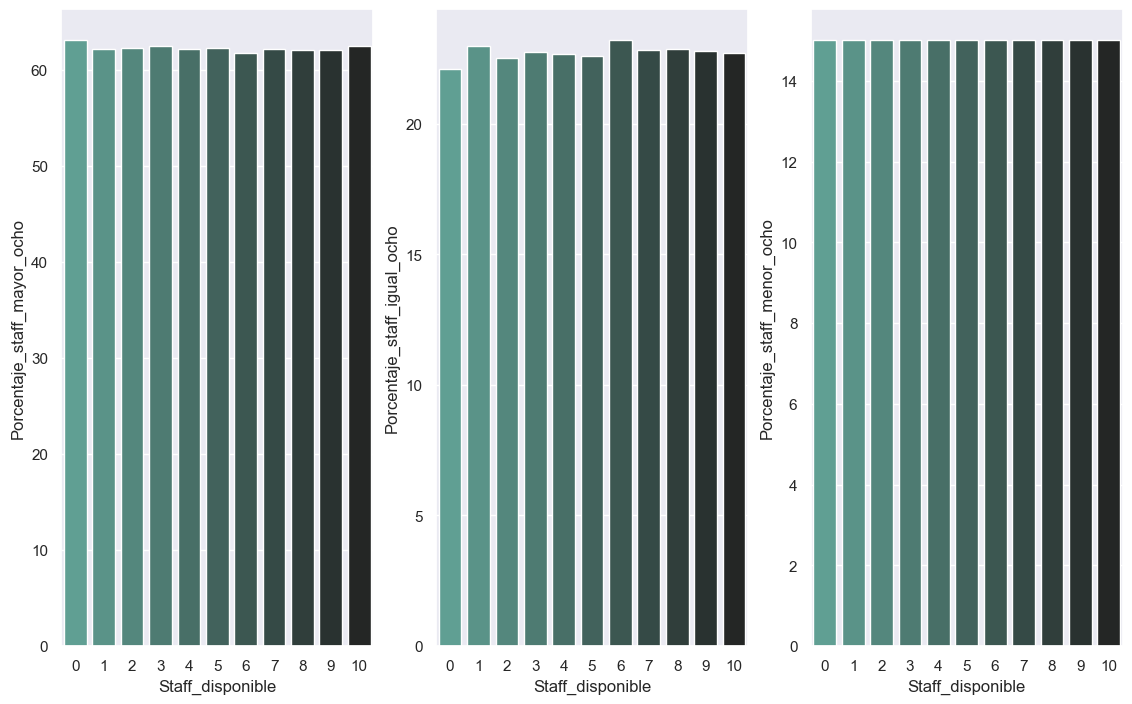

In [125]:
sns.set(rc={'figure.figsize':(13.7,8.27)})
fig,axes = plt.subplots(1,3)
sns.barplot(data= staff_df, x='Staff_disponible', y='Porcentaje_staff_mayor_ocho', ax=axes[0], palette="dark:#5A9_r")
sns.barplot(data= staff_df, x='Staff_disponible', y='Porcentaje_staff_igual_ocho', ax=axes[1], palette="dark:#5A9_r")
sns.barplot(data= staff_df, x='Staff_disponible', y='Porcentaje_staff_menor_ocho', ax=axes[2], palette="dark:#5A9_r")

Al ver esto, nos damos cuenta de que la columna de 'staff_available' cuenta con una distribución parecida, siempre que una persona se queda mas de 8 días hay más de un 60% de staff
disponible, si sumamos también la gente que se queda solo 8 días nos daría más de un 80%. mientras que cuando una persona se queda menos días, tiene menos personas del staff
a su cuidado. Pero si bien nos damos cuenta de que cuanto más días más staff disponible, creo que es interesante analizar según departamentos.

In [126]:
print('Distribución de staff en gynecology:','\n',hospitalizaciones_train.loc[hospitalizaciones_train['Department'] == 'gynecology']['staff_available'].value_counts())
print('')
print('Distribución de staff en radiotherapy:','\n',hospitalizaciones_train.loc[hospitalizaciones_train['Department'] == 'radiotherapy']['staff_available'].value_counts())

Distribución de staff en gynecology: 
 9     25862
10    25790
8     25747
3     25657
0     25636
7     25610
6     25584
1     25539
2     25432
4     25387
5     25381
Name: staff_available, dtype: int64

Distribución de staff en radiotherapy: 
 7     6434
10    6400
4     6372
3     6366
9     6270
0     6269
5     6263
8     6241
6     6203
2     6173
1     6141
Name: staff_available, dtype: int64


In [127]:
print('Distribución de staff en anesthesia:','\n',hospitalizaciones_train.loc[hospitalizaciones_train['Department'] == 'anesthesia']['staff_available'].value_counts())
print('')
print('Distribución de staff en TB & Chest disease:','\n',hospitalizaciones_train.loc[hospitalizaciones_train['Department'] == 'TB & Chest disease']['staff_available'].value_counts())

Distribución de staff en anesthesia: 
 2     3369
0     3362
3     3325
1     3300
4     3291
10    3283
8     3279
7     3272
6     3268
5     3252
9     3249
Name: staff_available, dtype: int64

Distribución de staff en TB & Chest disease: 
 5     1783
1     1747
8     1735
2     1729
6     1724
7     1709
4     1703
3     1697
0     1695
10    1660
9     1643
Name: staff_available, dtype: int64


In [128]:
print('Distribución de staff en surgery:','\n',hospitalizaciones_train.loc[hospitalizaciones_train['Department'] == 'surgery']['staff_available'].value_counts())

Distribución de staff en surgery: 
 6     1490
7      401
4      392
8      391
5      383
9      383
3      369
10     359
Name: staff_available, dtype: int64


In [129]:
#Correlación entre las columnas

hospitalizaciones_train.corr()

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days)
Available Extra Rooms in Hospital,1.000000,-0.003064,-0.005426,0.071073,-0.050775,-0.019383
staff_available,-0.003064,1.000000,-0.000350,0.001444,0.000816,0.006673
patientid,-0.005426,-0.000350,1.000000,-0.006393,0.011602,0.005567
Visitors with Patient,0.071073,0.001444,-0.006393,1.000000,-0.069566,0.027284
Admission_Deposit,-0.050775,0.000816,0.011602,-0.069566,1.000000,0.043899
Stay (in days),-0.019383,0.006673,0.005567,0.027284,0.043899,1.000000


Despues de analizar esta columna queda claro que cuantos más días se queda una persona, más staff tiene a sus disposición. También, nos dimos cuenta de que el departamento de gynecology es de los que más staff asociado tiene pero también de los que más rapido los pacientes se recuperan, mientras que surgery es de los que menos tiene y de los que más tiempo tardan en recuperarse, aunque podría ser porque hay menor requerimiento de personal pero más cualificado. Pero dejando de lado lo encontrado en esta columna, creo que no es necesario tenerla ya que podría empeorar el modelo, porque independientemente del staff disponible la persona va a tener un 80% de probabilidades de quedarse 8 o más días.

In [130]:
#Se elimina la columna por lo mencionado anteriormente. Y también voy a proceder a eliminar el 'patientid', ya que el id que puede llegar a tener
#un paciente en su hospital no influye en nada en cuánto tiempo tendría que quedar.

hospitalizaciones_train.drop(columns=['staff_available','patientid'], inplace=True)

In [131]:
#Distribución de la columna 'age'

hospitalizaciones_train['Age'].value_counts()

21-30     135029
31-40     106772
41-50      65973
11-20      36760
61-70      21781
51-60      17733
71-80      15384
81-90       6678
0-10        2753
91-100      1137
Name: Age, dtype: int64

In [132]:
#Con este bloque de código nos damos cuenta de que si el paciente es o un recíen nacido, tiene hasta diez años o tiene más de 50 años, tiene 100% de probabilidades de quedarse
#en el hospital más de 8 días. Mientras que si la persona tiene entre 11 y 50 años tiene aproximadamente 55% de probabilidades de quedarse más de 8 días 
# y 25% de quedarse 8 días exactos.

for ages in hospitalizaciones_train['Age'].value_counts().to_dict().keys():
    print(ages,info_column_value_percentage_whitout_print(hospitalizaciones_train,'Age',ages))

21-30 [59.58942153167097, 30.560842485688262, 9.849735982640766]
31-40 [50.834488442662874, 24.026898437792678, 25.138613119544452]
41-50 [52.101617328300975, 22.166643930092615, 25.731738741606414]
11-20 [56.683895538628946, 31.713819368879214, 11.602285092491838]
61-70 [100.0, 0.0, 0.0]
51-60 [100.0, 0.0, 0.0]
71-80 [100.0, 0.0, 0.0]
81-90 [100.0, 0.0, 0.0]
0-10 [100.0, 0.0, 0.0]
91-100 [100.0, 0.0, 0.0]


Creo que tener la columna de edad es muy importante ya que se puede ver que la edad es uno de los factores que más afecta a que una persona se quede más o menos días.

In [133]:
#Distribución de la columna 'gender'

hospitalizaciones_train['gender'].value_counts()

Female    299502
Male       92605
Other      17893
Name: gender, dtype: int64

In [134]:
#Porcentaje de los distintos valores de gender que estuvieron más, menos o ocho días.

for gender in hospitalizaciones_train['gender'].value_counts().to_dict().keys():
    print(gender,info_column_value_percentage(hospitalizaciones_train,'gender',gender),end='\n\n')

Porcentaje de días mayores a ocho de Female: 56.20329747380652
Porcentaje de días iguales a ocho de Female: 30.88860842331604
Porcentaje de días menores a ocho de Female: 12.908094102877444
Female None

Porcentaje de días mayores a ocho de Male: 78.83483613195833
Porcentaje de días iguales a ocho de Male: 0.6327952054424707
Porcentaje de días menores a ocho de Male: 20.53236866259921
Male None

Porcentaje de días mayores a ocho de Other: 78.69557927681217
Porcentaje de días iguales a ocho de Other: 0.5812328843681887
Porcentaje de días menores a ocho de Other: 20.72318783881965
Other None



In [135]:
for department in hospitalizaciones_train['Department'].value_counts().to_dict().keys():
    print('La cantidad de hombres en',department, 'es de:',len(hospitalizaciones_train.loc[(hospitalizaciones_train['gender'] == 'Male') & (hospitalizaciones_train['Department'] == department)]))

La cantidad de hombres en gynecology es de: 0
La cantidad de hombres en radiotherapy es de: 49834
La cantidad de hombres en anesthesia es de: 26194
La cantidad de hombres en TB & Chest disease es de: 13596
La cantidad de hombres en surgery es de: 2981


In [136]:
for department in hospitalizaciones_train['Department'].value_counts().to_dict().keys():
    print('La cantidad de mujeres en',department, 'es de:',len(hospitalizaciones_train.loc[(hospitalizaciones_train['gender'] == 'Female') & (hospitalizaciones_train['Department'] == department)]))

La cantidad de mujeres en gynecology es de: 281625
La cantidad de mujeres en radiotherapy es de: 9588
La cantidad de mujeres en anesthesia es de: 5062
La cantidad de mujeres en TB & Chest disease es de: 2616
La cantidad de mujeres en surgery es de: 611


In [137]:
for department in hospitalizaciones_train['Department'].value_counts().to_dict().keys():
    print('La cantidad de other en',department, 'es de:',len(hospitalizaciones_train.loc[(hospitalizaciones_train['gender'] == 'Other') & (hospitalizaciones_train['Department'] == department)]))

La cantidad de other en gynecology es de: 0
La cantidad de other en radiotherapy es de: 9710
La cantidad de other en anesthesia es de: 4994
La cantidad de other en TB & Chest disease es de: 2613
La cantidad de other en surgery es de: 576


Las conclusiones que podemos sacar de esta columna son: que si el paciente pertenece al género de los hombres o other no va a aparecer en gynecology, que las mujeres tienen una posibilidad muy alta de que asistan al departamento de gynecology y que las personas con el género other son menos propensas a cirugías. También, que tanto los hombres como las personas del género other tienen casi un 80% de probabilidades de una estadía de más de 8 días. Mientras que las mujeres tienen solo 56% de probabilidades de estar más de 8 días. Esta columna me parece que es muy importante, ya que analizando sus datos como se hizo anteriormente podemos llegar a predecir resultados de estadía.

In [138]:
#Distribución de la columna 'Type of Admission'

hospitalizaciones_train['Type of Admission'].value_counts()

Trauma       254698
Emergency    111374
Urgent        43928
Name: Type of Admission, dtype: int64

In [139]:
#Este código nos muestra la probabiliad que tiene una persona con un tipo de admisión específico de quedarse más,menos o 8 días.

for type in hospitalizaciones_train['Type of Admission'].value_counts().to_dict().keys():
    print(info_column_value_percentage(hospitalizaciones_train,'Type of Admission',type), end='\n\n')

Porcentaje de días mayores a ocho de Trauma: 62.87367784591949
Porcentaje de días iguales a ocho de Trauma: 22.116388821270682
Porcentaje de días menores a ocho de Trauma: 15.009933332809839
None

Porcentaje de días mayores a ocho de Emergency: 61.306947761596064
Porcentaje de días iguales a ocho de Emergency: 24.2830463124248
Porcentaje de días menores a ocho de Emergency: 14.410005925979133
None

Porcentaje de días mayores a ocho de Urgent: 61.45966126388635
Porcentaje de días iguales a ocho de Urgent: 22.370697505008195
Porcentaje de días menores a ocho de Urgent: 16.169641231105444
None



In [140]:
for department in hospitalizaciones_train['Department'].value_counts().to_dict().keys():
    print('La cantidad de Trauma en',department, 'es de:',len(hospitalizaciones_train.loc[(hospitalizaciones_train['Type of Admission'] == 'Trauma') & (hospitalizaciones_train['Department'] == department)]))

La cantidad de Trauma en gynecology es de: 173300
La cantidad de Trauma en radiotherapy es de: 39738
La cantidad de Trauma en anesthesia es de: 25657
La cantidad de Trauma en TB & Chest disease es de: 12726
La cantidad de Trauma en surgery es de: 3277


In [141]:
for department in hospitalizaciones_train['Department'].value_counts().to_dict().keys():
    print('La cantidad de Emergency en',department, 'es de:',len(hospitalizaciones_train.loc[(hospitalizaciones_train['Type of Admission'] == 'Emergency') & (hospitalizaciones_train['Department'] == department)]))

La cantidad de Emergency en gynecology es de: 79512
La cantidad de Emergency en radiotherapy es de: 20578
La cantidad de Emergency en anesthesia es de: 6830
La cantidad de Emergency en TB & Chest disease es de: 3754
La cantidad de Emergency en surgery es de: 700


In [142]:
for department in hospitalizaciones_train['Department'].value_counts().to_dict().keys():
    print('La cantidad de Urgent en',department, 'es de:',len(hospitalizaciones_train.loc[(hospitalizaciones_train['Type of Admission'] == 'Urgent') & (hospitalizaciones_train['Department'] == department)]))

La cantidad de Urgent en gynecology es de: 28813
La cantidad de Urgent en radiotherapy es de: 8816
La cantidad de Urgent en anesthesia es de: 3763
La cantidad de Urgent en TB & Chest disease es de: 2345
La cantidad de Urgent en surgery es de: 191


In [143]:
#Con este código creo un dataframe con lo cuenta de cuantas veces aparecen los distintos 'Type of Admission' según el 'Department'.

trauma_metrics = []

emergency_metrics = []

urgent_metrics = []

for department in hospitalizaciones_train['Department'].value_counts().to_dict().keys():
    trauma_metrics.append(len(hospitalizaciones_train.loc[(hospitalizaciones_train['Type of Admission'] == 'Trauma') & (hospitalizaciones_train['Department'] == department)]))

for department in hospitalizaciones_train['Department'].value_counts().to_dict().keys():
    emergency_metrics.append(len(hospitalizaciones_train.loc[(hospitalizaciones_train['Type of Admission'] == 'Emergency') & (hospitalizaciones_train['Department'] == department)]))

for department in hospitalizaciones_train['Department'].value_counts().to_dict().keys():
    urgent_metrics.append(len(hospitalizaciones_train.loc[(hospitalizaciones_train['Type of Admission'] == 'Urgent') & (hospitalizaciones_train['Department'] == department)]))

type_admission_by_department_df = pd.DataFrame({'Department':hospitalizaciones_train['Department'].value_counts().to_dict().keys(), 'trauma_metrics': trauma_metrics, 'emergency_metrics': emergency_metrics, 'urgent_metrics':urgent_metrics})
type_admission_by_department_df

,Department,trauma_metrics,emergency_metrics,urgent_metrics
0,gynecology,173300,79512,28813
1,radiotherapy,39738,20578,8816
2,anesthesia,25657,6830,3763
3,TB & Chest disease,12726,3754,2345
4,surgery,3277,700,191


<AxesSubplot: xlabel='Department', ylabel='urgent_metrics'>

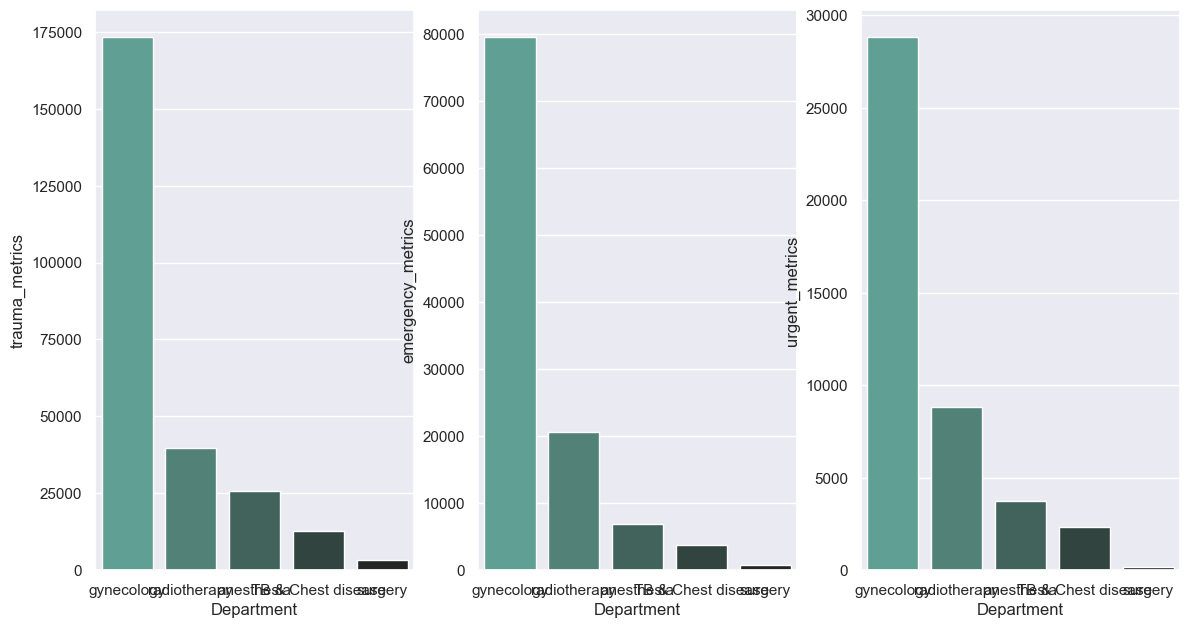

In [144]:
#Con este código grafico el dataframe mencionado anteriormente, en el cuál podemos ver como la inmensa mayoría de datos pertenece a 'ginecology' tanto en traumas, emergencias 
# y urgencias, creo que no es una columna que deba ser eliminada ni queda mucha información después del análisis de esta columna, pero

sns.set(rc={'figure.figsize':(14,7.27)})
fig,axes = plt.subplots(1,3)
sns.barplot(data= type_admission_by_department_df, x='Department', y='trauma_metrics', ax=axes[0], palette="dark:#5A9_r")
sns.barplot(data= type_admission_by_department_df, x='Department', y='emergency_metrics', ax=axes[1], palette="dark:#5A9_r")
sns.barplot(data= type_admission_by_department_df, x='Department', y='urgent_metrics', ax=axes[2], palette="dark:#5A9_r")

Las columnas que tienen que estar en este dataframe de entrenamiento son las de 'Severity of Illness' y 'health_conditions' ya que creo que son cosas determinantes a la hora del tiempo el cual el paciente se va a quedar en el hospital. El que se queden estas columnas o no es dificil de determinarlo en este momento, eso se va a ver dependiendo de las necesidades del modelo de Machine Learning a utilizar y de los ajustes al mismo para subir sus métricas. Lo que si voy a hacer es eliminar la columa 'Visitors with Patient' ya que creo que la cantidad de personas que visitan al paciente no determinan realmente cuánto tiempo va a estar la persona.

In [145]:
#Elimino la columna 'Visitors with Patient'

hospitalizaciones_train.drop(columns='Visitors with Patient', inplace=True)
hospitalizaciones_train

,Available Extra Rooms in Hospital,Department,doctor_name,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,Dr Sophia,41-50,Female,Trauma,Extreme,Diabetes,Yes,2966.408696,8
1,4,gynecology,Dr Sophia,31-40,Female,Trauma,Minor,Heart disease,No,3554.835677,9
2,2,gynecology,Dr Sophia,21-30,Female,Trauma,Extreme,Diabetes,Yes,5624.733654,7
3,4,gynecology,Dr Olivia,31-40,Female,Urgent,Moderate,None,No,4814.149231,8
4,2,anesthesia,Dr Mark,71-80,Male,Trauma,Moderate,Diabetes,No,5169.269637,34
...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,Dr Sarah,31-40,Female,Trauma,Minor,Asthama,Yes,3902.291076,8
409996,5,gynecology,Dr Nathan,21-30,Female,Trauma,Extreme,Other,No,4771.995223,9
409997,4,gynecology,Dr Sarah,21-30,Female,Emergency,Minor,Asthama,Yes,3816.994210,9
409998,10,gynecology,Dr Olivia,21-30,Female,Trauma,Moderate,Other,Yes,3841.577491,9


<AxesSubplot: >

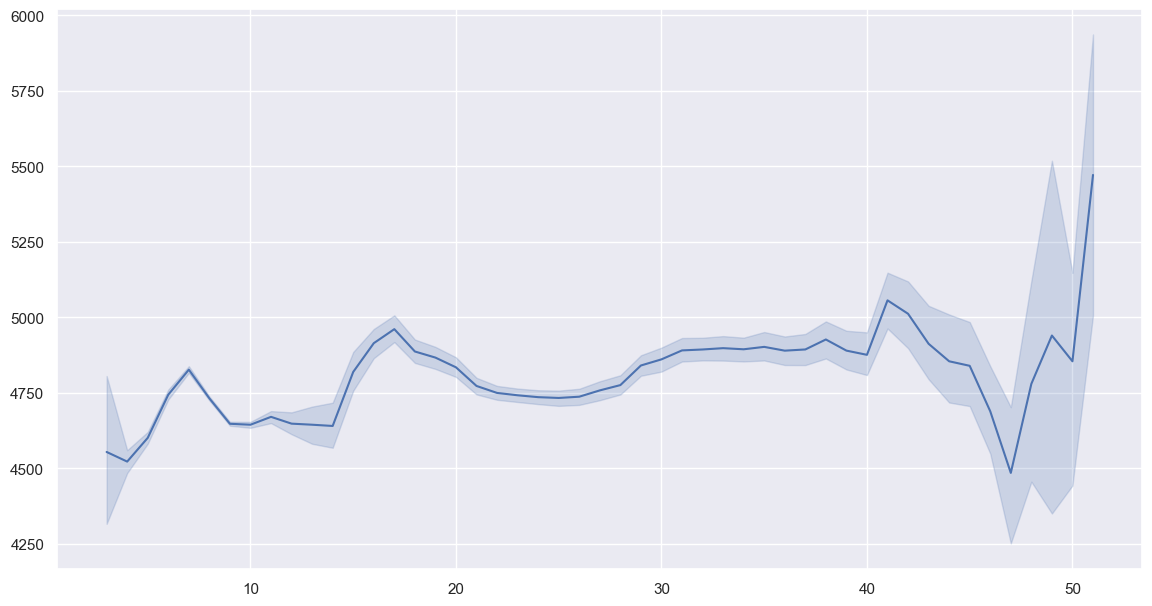

In [150]:
#Tratando de buscar la relación entre 'Admission_Deposit' y 'Stay (in days)' nos damos cuenta de que realmente no tienen demasiada, por lo que el pagar no determina
#realmente cuanto tiempo te vas a quedar, sino tu caso particular, el área o el porque te atiendas, si es algo menor, extremo,etc.

sns.lineplot(data=hospitalizaciones_train,x=hospitalizaciones_train['Stay (in days)'].to_list(),y=hospitalizaciones_train['Admission_Deposit'].to_list())

Luego de analizar las últimas dos columnas, llego a la conclusión de que voy a eliminar 'Admission_Deposit', ya que no existe una correlación realmente entre esta columan y los días que un paciente se va a quedar en el hospital. Esto puede llegar a verse por ejemplo si compararamos datos de un hospital público y otro privado, pero en este caso estamos analizando un hospital privado.
Si es eliminada la columna 'Admission_Deposit' entonces eso significa que ni el pagar ni tener una buena obra social/seguro médico te pueden llegar a ayudar a que estés menos tiempo en el hospital, puede ayudar, pero siempre va a ser más importante los síntomas y el área en el que te atiendas, por lo que voy a eliminar la columna 'Insurance' ya que la misma hace referencia a si el paciente tiene o no seguro médico/obra social y como vimos no tiene correlación.

In [151]:
hospitalizaciones_train.drop(columns=['Insurance', 'Admission_Deposit'], inplace=True)
hospitalizaciones_train

,Available Extra Rooms in Hospital,Department,doctor_name,Age,gender,Type of Admission,Severity of Illness,health_conditions,Stay (in days)
0,4,gynecology,Dr Sophia,41-50,Female,Trauma,Extreme,Diabetes,8
1,4,gynecology,Dr Sophia,31-40,Female,Trauma,Minor,Heart disease,9
2,2,gynecology,Dr Sophia,21-30,Female,Trauma,Extreme,Diabetes,7
3,4,gynecology,Dr Olivia,31-40,Female,Urgent,Moderate,None,8
4,2,anesthesia,Dr Mark,71-80,Male,Trauma,Moderate,Diabetes,34
...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,Dr Sarah,31-40,Female,Trauma,Minor,Asthama,8
409996,5,gynecology,Dr Nathan,21-30,Female,Trauma,Extreme,Other,9
409997,4,gynecology,Dr Sarah,21-30,Female,Emergency,Minor,Asthama,9
409998,10,gynecology,Dr Olivia,21-30,Female,Trauma,Moderate,Other,9


Después del EDA hay que realizar cambios en los datos, ya que en algunas columnas nos dimos cuenta de que cuando ocurría un evento, esto daba con muchísima certeza que la persona se iba a quedar más de 8 días, o 8 días. Ahora voy a cambiar la columna Stay a 0 si la persona se queda 8 o menos días y si se queda más de 8 días 1.
Luego del análisis podemos decir que en los siguientes casos el paciente tiene muchísima probabilidad o realmente se va a quedar más de 8 días: 

* Las personas que se atienden en el departamento de Anesthesia se quedan SIEMPRE más de 8 días.

* El departamento de Surgery tiene 99.95% de personas que se quedan más de 8 días. Por lo que voy a tomarlo como si todas las personas se quedaran más de 8 días, esto debido a que pueden llegar a ser un Falso Negativo y en salud me parece mucho mejor Falsos Positivos.

* Los paciente del departamento de TB & Chest disease tienen un 97% de probabilidades de quedarse más de 8 días. En este caso hay dos caminos a seguir: tomarlos como Falsos Negativos y que la probabilidad sea del 100%, o dejar la columna como está. Creo que eso es mejor verlo a la hora de testear el modelo.

* También, según lo visto en el dataframe: Si el paciente es atendido por el Dr.Mark, Dr.Isaac o el Dr.Simon tiene más de un 98% de probabilidades de quedarse más de ocho días. En este caso voy a realizar lo anteriormente mencionado cuando me refería a TB & Chest disease, esto es mejor verlo a la hora de entrenar el modelo.  

* Si sos un paciente y tenés entre 0 a 10 años o más de 51, SIEMPRE te vas a quedar más de ocho días en el hospital, independientemente de el departamento o porque fuiste.

* Si tu género es Male o Other, nunca vas a estar asistir al departamento de gynecology.

Este es el resultado preliminar, toca probar el modelo teniendo en cuenta lo descubierto.